In [75]:
import glob
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from skimage.color import label2rgb
import os
import rasterio
from scipy.misc import imread, imsave

%matplotlib inline

In [9]:
austin15_labels = glob.glob('kabul,austin,denver,dc_outputs/austin15*')
austin15_satellite = glob.glob('kabul,austin,denver,dc/austin15*')

In [34]:
raw_tif = glob.glob(os.path.join('cities', 'austin15', '*.tif'))
r = rasterio.open([path for path in raw_tif if '.NDWI.' in path][0]).read().squeeze(0)
water = np.zeros(r.shape)
water[np.where(r > 0.0)] = 1
water_img = label2rgb(water, colors=['black', 'white'])

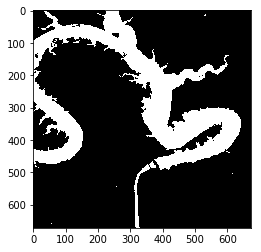

In [43]:
plt.imshow(water_img[:224*3, :224*3])

In [56]:
top_left = np.zeros((224*3, 224*3))
for r in range(3) :
    for c in range(3) :
        top_left[r*224:(r+1)*224, c*224:(c+1)*224] = np.load(os.path.join('kabul,austin,denver,dc_outputs', \
                                                                          'austin15_{}_{}.npy'.format(r,c)))

In [57]:
r, c = water[:224*3, :224*3].shape

In [58]:
top_left_changed = np.copy(top_left)
for r_ix in range(r) :
    for c_ix in range(c):
        if water[r_ix, c_ix] == 1 :
            top_left_changed[r_ix, c_ix] = 7

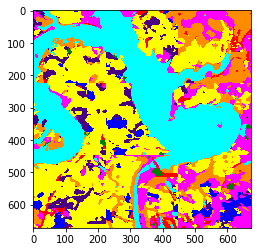

In [59]:
plt.imshow(label2rgb(top_left_changed))

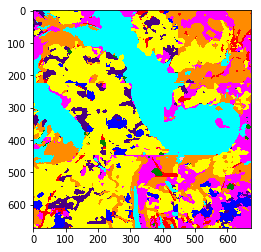

In [60]:
plt.imshow(label2rgb(top_left))

In [63]:
sat_top_left = np.zeros((224*3, 224*3, 3))
for r in range(3) :
    for c in range(3) :
        sat_top_left[r*224:(r+1)*224, c*224:(c+1)*224] = imread(os.path.join('kabul,austin,denver,dc', \
                                                                          'austin15_{}_{}.jpg'.format(r,c)))

In [81]:
ndwi_change = np.zeros((224*3, 224*3*3, 3))

In [82]:
ndwi_change[:, :224*3, :] = sat_top_left
ndwi_change[:, 224*3:224*3*2, :] = label2rgb(top_left)*255.
ndwi_change[:, 224*3*2:, :] = label2rgb(top_left_changed)*255.

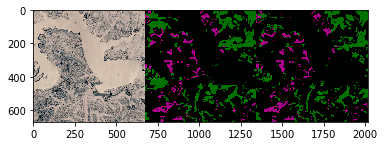

In [83]:
plt.imshow(ndwi_change)

In [84]:
imsave('ndwi_change.jpg', ndwi_change)